In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [147]:
GlpG_seq = "ERAGPVTWVMMIACVVVFIAMQILGDQEVMLWLAWPFDPTLKFEFWRYFTHALMHFSLMHILFNLLWWWYLGGAVEKRLGSGKLIVITLISALLSGYVQQKFSGPWFGGLSGVVYALMGYVWLRGERDPQSGIYLQRGLIIFALIWIVAGWFDLFGMSMANGAHIAGLAVGLAMAFVDSLN"

In [148]:
seq = GlpG_seq

In [149]:
len(seq)

181

In [150]:
seq_dataFrame = pd.DataFrame({"oneLetterCode":list(seq)})
HFscales = pd.read_table("/Users/weilu/opt/small_script/Whole_residue_HFscales.txt")
# Octanol Scale
code = {"GLY" : "G", "ALA" : "A", "LEU" : "L", "ILE" : "I",
        "ARG+" : "R", "LYS+" : "K", "MET" : "M", "CYS" : "C",
        "TYR" : "Y", "THR" : "T", "PRO" : "P", "SER" : "S",
        "TRP" : "W", "ASP-" : "D", "GLU-" : "E", "ASN" : "N",
        "GLN" : "Q", "PHE" : "F", "HIS+" : "H", "VAL" : "V",
        "M3L" : "K", "MSE" : "M", "CAS" : "C" }
HFscales_with_oneLetterCode = HFscales.assign(oneLetterCode = HFscales.AA.str.upper().map(code)).dropna()
data = seq_dataFrame.merge(HFscales_with_oneLetterCode, on="oneLetterCode", how="left")

In [191]:
x = HFscales_with_oneLetterCode["DGwif"].values
y = HFscales_with_oneLetterCode["DGwoct"].values

In [192]:
x

array([ 0.17,  0.81,  0.42,  1.23, -0.24,  0.58,  2.02,  0.01,  0.96,
       -0.31, -0.56,  0.99, -0.23, -1.13,  0.45,  0.13,  0.14, -1.85,
       -0.94,  0.07])

In [199]:
import scipy
from scipy import stats

In [200]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)

In [202]:
r_value

0.92513072255407491

In [203]:
intercept

0.27784121149986918

In [201]:
s

<module 'scipy.stats' from '/Users/weilu/anaconda3/lib/python3.6/site-packages/scipy/stats/__init__.py'>

<IPython.core.display.Javascript object>


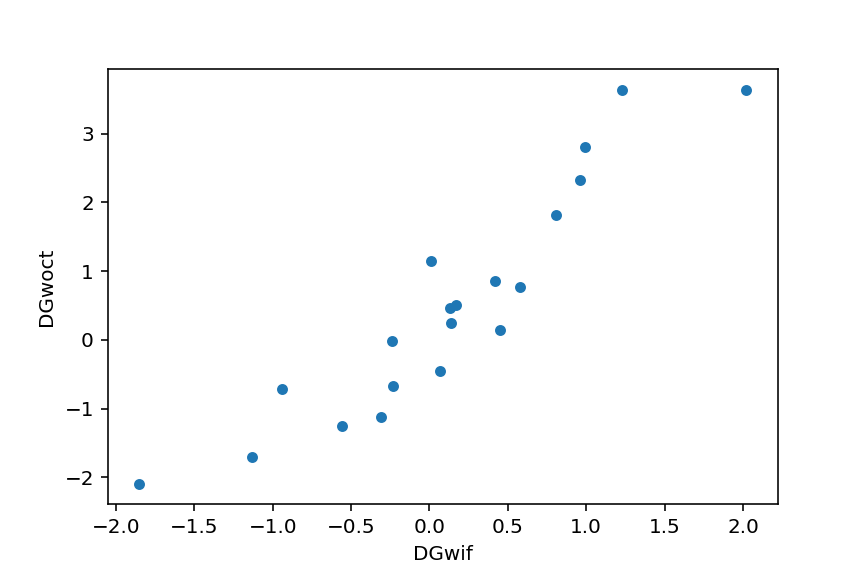

In [186]:
HFscales_with_oneLetterCode.plot("DGwif", "DGwoct", kind="scatter")

<IPython.core.display.Javascript object>


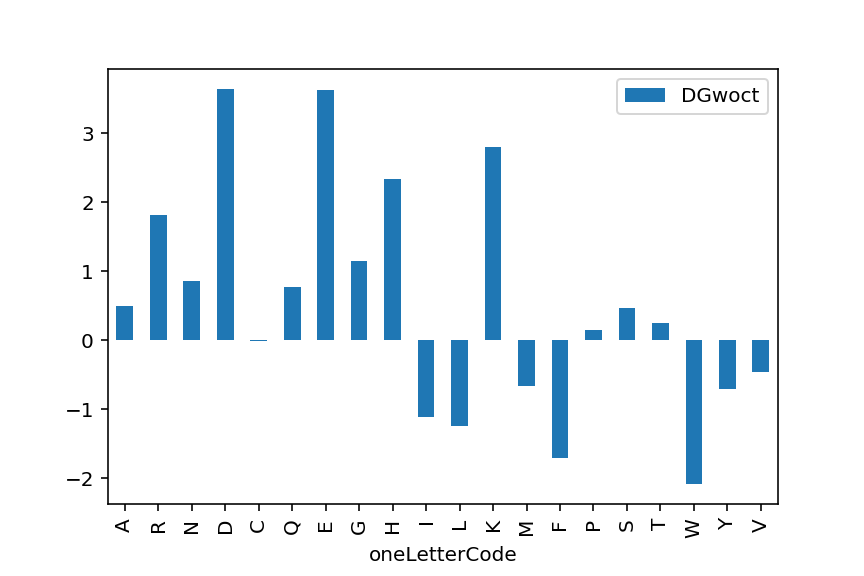

In [183]:
HFscales_with_oneLetterCode.plot("oneLetterCode", "DGwoct", kind="bar")

<IPython.core.display.Javascript object>


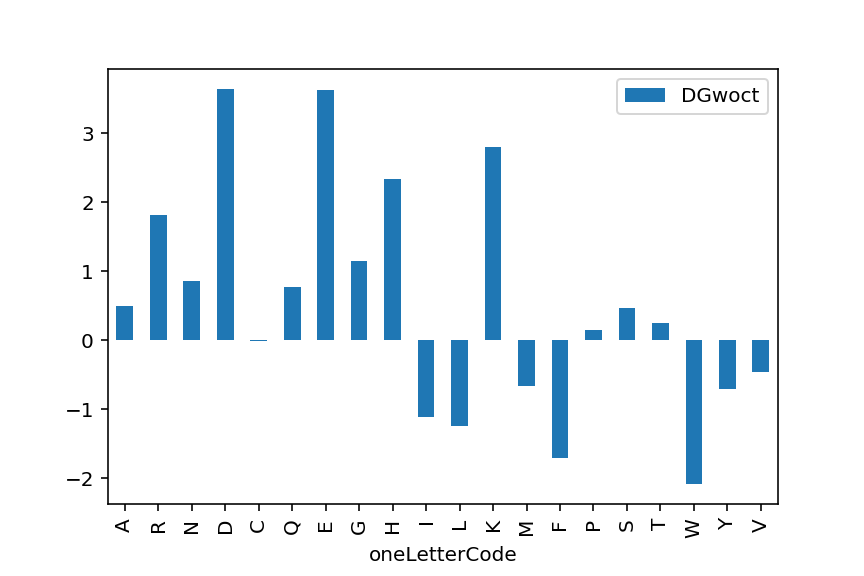

In [151]:
HFscales_with_oneLetterCode.plot("oneLetterCode", "DGwoct", kind="bar")

In [156]:
def isHelix(id):
    helices_list = [(94,114), (147,168), (171, 192), (200, 217), (226, 241), (250, 269)]
    for count, (i, j) in enumerate(helices_list):
        if id >= i and id <= j:
            return 1+count
    return 0
data["resId"] = 91 + data.index
data["isHelix"] = data["resId"].apply(isHelix)

In [163]:
data["DGwoct"].to_csv("/Users/weilu/Research/server/jan_2018/week_of_jan22/equal_lipid_pressure_unfolding/pressure_0.1/simulation/0/zim_jan27", index=False)

In [158]:
# data.to_feather("/Users/weilu/Research/data/pulling/GlpG_Hydrophobicity.feather")

In [173]:
location = "/Users/weilu/Research/server/jan_2018/week_of_jan22/equal_lipid_pressure_unfolding/pressure_0.1/simulation/0/"
zim123 = pd.read_table(location+"zim_zero_one", names=["zim_123"])

In [174]:
data.join(zim123).to_feather("/Users/weilu/Research/data/pulling/GlpG_Hydrophobicity.feather")

<IPython.core.display.Javascript object>


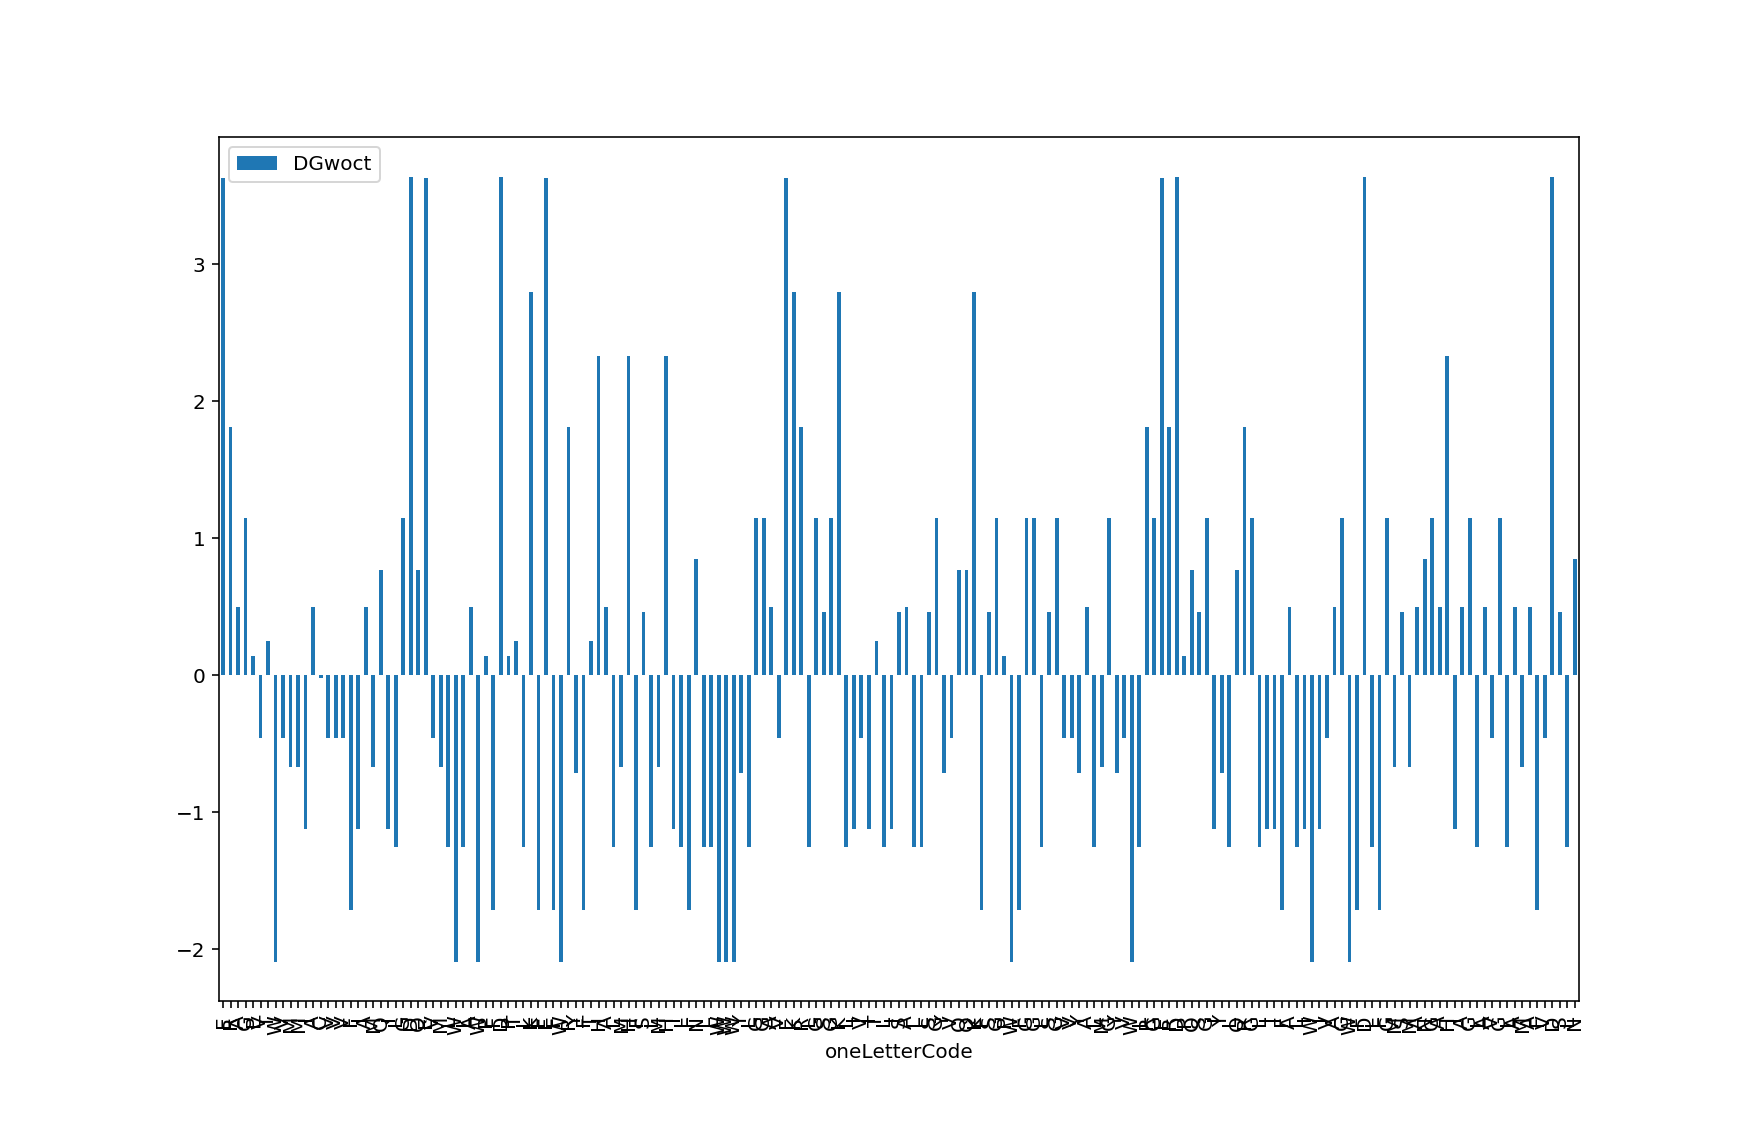

In [110]:
data.plot("oneLetterCode", "DGwoct", kind="bar")
plt.show()

<IPython.core.display.Javascript object>


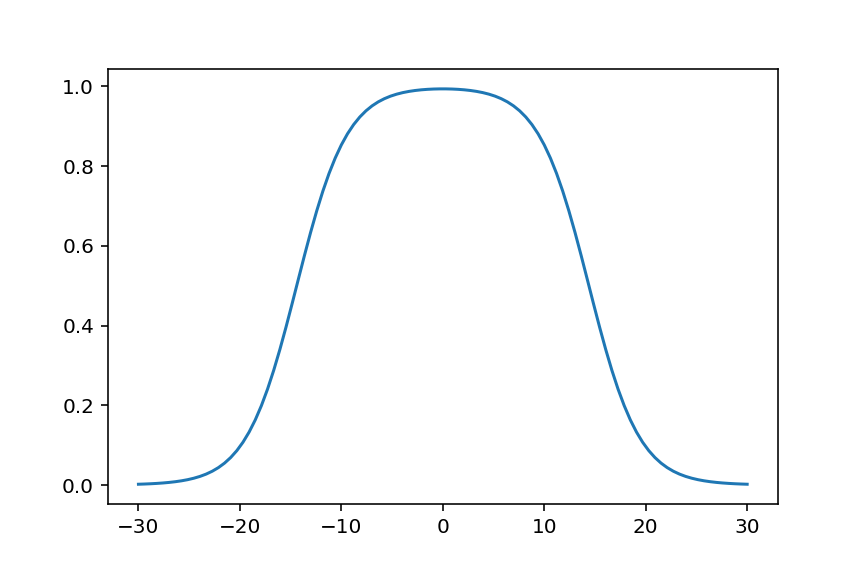

In [182]:
def V_membrane(z, kbin=0.2, memb=14.4):
    return 0.5*(np.tanh(kbin*(z+memb)) + np.tanh(kbin*(memb-z)))
kbin = 0.2
memb = 14.4
z = np.linspace(-30,30,100)
v = V_membrane(z, kbin, memb)
plt.plot(z,v)

In [179]:
V_membrane(-20)/V_membrane(0)

0.096822766552771625

In [180]:
V_membrane(-10)/V_membrane(0)

0.85854569921930957